In [46]:
%run ../talktools.py

# Web Development with Python

AY250 Spring 2018-2022

```
git pull; pip install flask requests httpx[cli]
```

<img src="http://www.opensourceforu.com/wp-content/uploads/temp-uploads/2010/06/Python-bite.jpg">

http://www.linuxforu.com/how-to/django-when-python-bites-the-web/

## Outline


1. Network Communication Overview
  - HTTP overview
  - `requests`, `beautifulsoup`

2. The web paradigm

3. Using Python for the Web

   - Basic Python servers

   - Frameworks and using Flask


## Network Communication Overview

- TCP/IP sockets: Most all network communication, also UDP  
- TCP (Transmission Control Protocol): exchange data reliably between two network hosts
- IP (Internet Protocol): handles addressing & routing messages across one or more networks

<hr>
<img src="http://flylib.com/books/3/475/1/html/2/images/0131777203/graphics/14fig02.gif">
<hr>
<img src="http://i.cloud.opensystemsmedia.com/i__srcbc84f1fa314969f2dc009b8711c679ce_paraf0d99c20bd457d46a92c72841873c47.jpeg">
<hr>
<img src="https://microchip.wdfiles.com/local--files/tcpip:tcp-ip-five-layer-model/layer_terminology.JPG">

# Accessing a Web address (URL)

<quote>Why? Who would ever want to easily automate URL (Uniform Resource Locator) retrieval and form submission in a scripting language?
</quote>

 - Data mining
 - Submitting information to another system
 - Accessing remote compute resources (“webservices”)
 - Get microservices

# HTTP Overview

Hypertext Transfer Protocol

- HTTP takes place along TCP/IP sockets (typically port 80)
- HTTP is used to transmit resources
    - resources can be files, query results, server side script output

<img src="http://www.oreilly.com/openbook/webclient/wcp_0302.gif">

Communication initiated by Client opening connection & sending request message to Server.  Server then returns a response message containing the resource that was requested. After delivering the response the Server closes the connection.

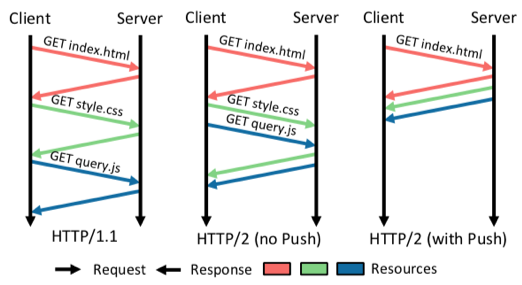
(Source: https://blog.apnic.net/2018/04/26/adoption-performance-and-human-perception-of-http-2-server-push/)

The two most used request methods are **GET** and **POST**

## Requests

Most modern web interactions are complicated. [`requests`](http://docs.python-requests.org/en/latest/user/advanced/) is your friend


```python
requests.get('https://api.github.com/user',
              auth=('user', 'pass'))

requests.post('https://api.github.com/user', 
              data=stuff_I_want_to_store,
              auth=('user', 'pass'))
```
streaming, keep-alive, etc.  Also know that `httpx` is an emerging package for async requests. Of course `urllib` provides tools & functions for lower-level interactions. 

See https://docs.python.org/3/library/urllib.request.html#module-urllib.request

# Access an FTP server

In [47]:
import ftplib
ftp = ftplib.FTP("ftp.ee.lbl.gov")
ftp.login()

'230 Anonymous access granted, restrictions apply'

In [48]:
ftp.cwd("talks")

'250 CWD command successful'

In [49]:
ftp.dir()

-r--r--r--   1 ftp      ftp           326 Jan  8  1998 README.html
-r--r--r--   1 ftp      ftp         27322 Oct 16  1995 adminscope.ps.Z
lr--r--r--   1 ftp      ftp            11 Oct 17  2004 cache97.ps -> sf-cache.ps
lr--r--r--   1 ftp      ftp            16 Oct 17  2004 dartnet.ps -> sf-dartnet-95.ps
-r--r--r--   1 ftp      ftp         81947 Jan 28  1995 hiermulti.ps
lr--r--r--   1 ftp      ftp            12 Oct 17  2004 linktalk.ps -> sf-cbq-95.ps
lr--r--r--   1 ftp      ftp            14 Oct 17  2004 linktalk.ps.Z -> sf-cbq-95.ps.Z
-r--r--r--   1 ftp      ftp        325845 Apr 22  1997 linktalk3.ps
-r--r--r--   1 ftp      ftp         30450 Oct  3  1994 lws-privacy.ps.Z
-r--r--r--   1 ftp      ftp        196021 Mar 19  1995 redtalk.ps.Z
lr--r--r--   1 ftp      ftp            14 Oct 17  2004 sacks.ps -> sf-sacks-96.ps
-r--r--r--   1 ftp      ftp         13599 Sep 24  1997 sf-RMreq.ps
-r--r--r--   1 ftp      ftp        797880 Feb  1  1998 sf-cache.pdf
-r--r--r--   1 ftp      ftp     

In [50]:
ftp.retrbinary('RETR vj-webflame.pdf', 
               open('vj-webflame.pdf', 'wb').write)

'226 Transfer complete'

In [51]:
!open vj-webflame.pdf

# HTML Overview

 - HyperText Markup Language
 - The code in which webpages are written
 - Consists of tags surrounded by angled brackets, < and >
 - An HTML document has a hierarchy enforced by the ordering and nesting of tags
 - It can be thought of like a tree with branches
 
 Examples at 
http://www.w3schools.com/html/html_examples.asp
http://www.sheldonbrown.com/web_sample1.html

Actual HTML looks like this:

```html
<!DOCTYPE html>
<html>
<head>
<title>A simple HTML Document</title>
</head>
<body>
<h1>This is a Heading</h1>
<p>This is a paragraph</p>
</body>
</html>
```

Let's take a look at a page: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/337/gaia

## html5lib

In [52]:
import html5lib
response = urlopen("http://words.bighugelabs.com/")
html = response.read()
doc = html5lib.parse(html)

In [56]:
print(html)

b'<!DOCTYPE html>\n<html>\n<head>\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8">\n    <title>\n        Big Huge Thesaurus API            </title>\n    <meta name="description" content="Get english synonyms, antonyms, sound-alike, and rhyming words from the Big Huge Thesaurus.">\n\n    <meta property="og:title" content="Big Huge Thesaurus">\n    <meta property="og:type" content="article">\n    <meta property="og:description" content="Get english synonyms, antonyms, sound-alike, and rhyming words from the Big Huge Thesaurus.">\n    <meta property="og:url" content="https://words.bighugelabs.com">\n    <meta property="og:image" content="https://words.bighugelabs.com/images/card.jpg">\n\n    <meta name="twitter:card" content="summary_large_image">\n    <meta name="twitter:title" content="Big Huge Thesaurus">\n    <meta name="twitter:url" content="https://words.bighugelabs.com">\n    <meta name="twitter:description" content="Get english synonyms, antonyms, sound-ali

- doc is now a tree in “simpletree” format. 
- html5lib also supports minidom, ElementTree, lxml, and BeautifulSoup tree formats.
- lxml, in particular, is good for creating well-formed html and xml.

# Parsing HTML with BeautifulSoup

Beautiful Soup parses a (possibly invalid) XML or HTML document into a tree representation. It provides methods and Pythonic idioms that make it easy to navigate, search, and modify the tree.


See: http://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [57]:
from urllib.request import urlopen
    
response = urlopen("http://words.bighugelabs.com/")
html = response.read()
response.close()

In [58]:
print(html)

b'<!DOCTYPE html>\n<html>\n<head>\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8">\n    <title>\n        Big Huge Thesaurus API            </title>\n    <meta name="description" content="Get english synonyms, antonyms, sound-alike, and rhyming words from the Big Huge Thesaurus.">\n\n    <meta property="og:title" content="Big Huge Thesaurus">\n    <meta property="og:type" content="article">\n    <meta property="og:description" content="Get english synonyms, antonyms, sound-alike, and rhyming words from the Big Huge Thesaurus.">\n    <meta property="og:url" content="https://words.bighugelabs.com">\n    <meta property="og:image" content="https://words.bighugelabs.com/images/card.jpg">\n\n    <meta name="twitter:card" content="summary_large_image">\n    <meta name="twitter:title" content="Big Huge Thesaurus">\n    <meta name="twitter:url" content="https://words.bighugelabs.com">\n    <meta name="twitter:description" content="Get english synonyms, antonyms, sound-ali

In [61]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

Let's load up a whole bunch of baby names, by combining scripted webpage access with BeautifulSoup:

In [62]:
from bs4 import BeautifulSoup
url = "https://nameberry.com/search/boys-names/j"
response = urlopen(url)
html = response.read()
response.close()
soup = BeautifulSoup(html,"html.parser")

In [63]:
items = soup.findAll("li", class_="Listing-name")
print(items)

[<li class="jsx-2172404982 Listing-name pt-15 pb-15 bdb-gray-light flex }" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem"><meta class="jsx-2172404982" content="1" itemprop="position"/><meta class="jsx-2172404982" content="https://nameberry.com/babyname/jaakko" itemprop="url"/><span class="Heart pointer t-label -male" data-object-id="72271"><span class="jsx-3235452300 Icon -male"><span class="jsx-2464474020 Svg"><svg height="20px" on="tap:account-modal.toggleClass(class='-open')" role="button" tabindex="0" version="1.1" viewbox="0 0 20 20" width="20px"><title>Heart</title><path class="stroke" d="M6.45864281,3 C4.39175113,2.99980769 2.49613657,4.53932692 2.10490764,6.66115385 C1.85044979,8.04134615 2.07011245,9.375 2.64216068,10.6405769 C3.25806432,12.0029808 4.17478727,13.1528846 5.21016081,14.1933654 C6.57565486,15.5658654 8.12100435,16.7190385 9.6645225,17.8698077 C9.78028154,17.9561538 9.88900444,18 9.99849842,18 C10.1159924,18 10.2344502,17.9495192 10.

In [66]:
items[20]

<li class="jsx-2172404982 Listing-name pt-15 pb-15 bdb-gray-light flex }" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem"><meta class="jsx-2172404982" content="21" itemprop="position"/><meta class="jsx-2172404982" content="https://nameberry.com/babyname/jacobus" itemprop="url"/><span class="Heart pointer t-label -male" data-object-id="71549"><span class="jsx-3235452300 Icon -male"><span class="jsx-2464474020 Svg"><svg height="20px" on="tap:account-modal.toggleClass(class='-open')" role="button" tabindex="0" version="1.1" viewbox="0 0 20 20" width="20px"><title>Heart</title><path class="stroke" d="M6.45864281,3 C4.39175113,2.99980769 2.49613657,4.53932692 2.10490764,6.66115385 C1.85044979,8.04134615 2.07011245,9.375 2.64216068,10.6405769 C3.25806432,12.0029808 4.17478727,13.1528846 5.21016081,14.1933654 C6.57565486,15.5658654 8.12100435,16.7190385 9.6645225,17.8698077 C9.78028154,17.9561538 9.88900444,18 9.99849842,18 C10.1159924,18 10.2344502,17.9495192 10

In [68]:
items[20].a.span.get_text()

'Jacobus'

In [69]:
import string

kid_names = []
for n in string.ascii_lowercase:
    url = "https://nameberry.com/search/boys-names/" + n
    response = urlopen(url)
    html = response.read()
    response.close()
    soup = BeautifulSoup(html,"html.parser")
    items = soup.findAll("li", class_="Listing-name")
    for item in items:
        if len(item.findAll("a")) == 1:
            kid_names.append(item.a.span.get_text())

In [70]:
print(kid_names)

['Aadam', 'Aaden', 'Aage', 'Aakil', 'Aalam', 'Aalto', 'Aalto', 'Aang', 'Aapo', 'Aaprahami', 'Aarav', 'Aarin', 'Aariv', 'Aaro', 'Aaron', 'Aart', 'Aaru', 'Aarush', 'Aatos', 'Aayan', 'Abacus', 'Abaddon', 'Aban', 'Abanito', 'Abanu', 'Abba', 'Abbas', 'Abbott', 'Abdalla', 'Abdallah', 'Abdiel', 'Abdirahman', 'Abdu', 'Abdul', 'Abdullah', 'Abe', 'Abebe', 'Abednego', 'Abeeku', 'Abel', 'Abelard', 'Abelardo', 'Aberdeen', 'Abi', 'Abiah', 'Abiathar', 'Abidan', 'Abiel', 'Abihu', 'Abijah', 'Abilene', 'Abimael', 'Abir', 'Abishai', 'Abit', 'Able', 'Abner', 'Abraham', 'Abram', 'Abrams', 'Abrar', 'Abraxas', 'Absalom', 'Abt', 'Abush', 'Abán', 'Acacius', 'Acai', 'Ace', 'Acer', 'Achaakatabi', 'Acheron', 'Achille', 'Achilles', 'Acker', 'Acre', 'Actaeon', 'Acton', 'Adagio', 'Adahy', 'Adaiah', 'Adair', 'Adalius', 'Adalmund', 'Adam', 'Adan', 'Add', 'Adda', 'Addar', 'Addax', 'Addison', 'Adelio', 'Ademar', 'Ademir', 'Aden', 'Adeola', 'Adeon', 'Adhit', 'Adil', 'Adinah', 'Babar', 'Babson', 'Bacchus', 'Bach', 'Bachel

In [71]:
len(kid_names)

2456

In [72]:
kid_names.sort()
print(str(len(kid_names)) + " names from " + \
       kid_names[0] + " to " + kid_names[-1] + ".")

2456 names from Aadam to Zeppelin.


To demonstrate we downloaded and parsed all the names, and to have a little fun, let's make up an official-sounding name for a childish Congressman.

In [74]:
import random
proper_person_name = ""
for n in range(3):
    proper_person_name += random.choice(kid_names) + " "
proper_person_name = "Congressperson " + proper_person_name[:-1] + " XVI" + " PhD"
print(proper_person_name)

Congressperson Jamin Fahari Talman XVI PhD


# JSON

JSON is a light-weight data interchange format. 

Some web service APIs can output in JSON and the json  Python module facilitates parsing.

www.json.org/

In [81]:
import json
import joshkey
base_domain = "http://words.bighugelabs.com/"

api_key =  joshkey.API # get your own damn key!
word = "hack"

url = base_domain + "api/2/" + api_key + "/" + word + "/json"
print(url)

result = json.loads(urlopen(url).read().decode("UTF-8")) # a dictionary!
print(type(result))
print(result)

http://words.bighugelabs.com/api/2/483e281b60496d7961d852629799e733/hack/json
<class 'dict'>
{'noun': {'syn': ['drudge', 'hacker', 'machine politician', 'ward-heeler', 'political hack', 'hack writer', 'literary hack', 'cab', 'taxi', 'taxicab', 'jade', 'nag', 'plug', 'author', 'auto', 'automobile', 'car', 'Equus caballus', 'horse', 'machine', 'motorcar', 'mount', 'pol', 'political leader', 'politician', 'politico', 'riding horse', 'saddle horse', 'tool', 'unskilled person', 'writer']}, 'verb': {'syn': ['chop', 'cut', 'hack on', 'cut up', 'whoop', 'contend', 'cope', 'cough', 'deal', 'edit', 'foul', 'get by', 'grapple', 'make do', 'make out', 'manage', 'program', 'programme', 'redact'], 'rel': ['chop down', 'chop off', 'chop up']}}


In [79]:
type(result)

dict

In [82]:
import pprint
pprint.pprint(result)

{'noun': {'syn': ['drudge',
                  'hacker',
                  'machine politician',
                  'ward-heeler',
                  'political hack',
                  'hack writer',
                  'literary hack',
                  'cab',
                  'taxi',
                  'taxicab',
                  'jade',
                  'nag',
                  'plug',
                  'author',
                  'auto',
                  'automobile',
                  'car',
                  'Equus caballus',
                  'horse',
                  'machine',
                  'motorcar',
                  'mount',
                  'pol',
                  'political leader',
                  'politician',
                  'politico',
                  'riding horse',
                  'saddle horse',
                  'tool',
                  'unskilled person',
                  'writer']},
 'verb': {'rel': ['chop down', 'chop off', 'chop up'],
        

A more fleshed-out example code, prints the output more cleanly.

In [83]:
import sys
base_domain = "http://words.bighugelabs.com/"
word = "hack"
print("Retrieving thesaurus entry for \"" + word + "\".")
url = base_domain + "api/2/" + api_key + "/" + word + "/json"
try:
    result = json.loads(urlopen(url).read().decode("UTF-8")) # a dictionary!
except:
    print("Error - word probably not in thesaurus.")
    #sys.exit()
for part_of_speech in result:
    print("-"*50)
    print("These are the " + part_of_speech + " entries:")
    for key in ["syn", "ant", "rel"]:
        try:
            for synonym in result[part_of_speech][key]:
                print(key + " - " + synonym)
        except:
            continue

Retrieving thesaurus entry for "hack".
--------------------------------------------------
These are the noun entries:
syn - drudge
syn - hacker
syn - machine politician
syn - ward-heeler
syn - political hack
syn - hack writer
syn - literary hack
syn - cab
syn - taxi
syn - taxicab
syn - jade
syn - nag
syn - plug
syn - author
syn - auto
syn - automobile
syn - car
syn - Equus caballus
syn - horse
syn - machine
syn - motorcar
syn - mount
syn - pol
syn - political leader
syn - politician
syn - politico
syn - riding horse
syn - saddle horse
syn - tool
syn - unskilled person
syn - writer
--------------------------------------------------
These are the verb entries:
syn - chop
syn - cut
syn - hack on
syn - cut up
syn - whoop
syn - contend
syn - cope
syn - cough
syn - deal
syn - edit
syn - foul
syn - get by
syn - grapple
syn - make do
syn - make out
syn - manage
syn - program
syn - programme
syn - redact
rel - chop down
rel - chop off
rel - chop up
